In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os.path import join
import librosa
from scipy.signal import wiener
from joblib import dump, load
from time import time
from datetime import datetime
import shutil 
import argparse
from functools import partial
import pickle
from IPython.display import Audio
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [2]:
np_load_old = partial(np.load)
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

## Load Data 

In [25]:
SAMPLE = 22050

In [26]:
def load_audio(audio_paths):
    # force to load audio on 44100 sample rate, this rate can be resample down
    return np.array([ librosa.load(file, sr=SAMPLE)[0] for file in audio_paths ])

def import_data(data_path):
    
    data_path = join(data_path,'original')
    
    data = []
    with open(join(data_path,'sound_set.txt'), 'r') as f:
        data = np.array(f.read().split(','))
    audio_paths = [join(data_path,file+'.wav') for file in data]
    labels = []

    audio_data = load_audio(audio_paths)
    return audio_data

In [27]:
DATA_PATH = '../../data/d_records/d_record_aj'
PREP_FOLDER = 'prep_data_13'
AMP = 0.15
# STRETCH = 0.8

In [28]:
audio = import_data(DATA_PATH)

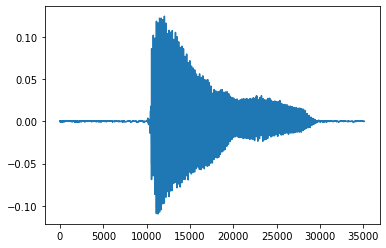

In [29]:
plt.plot(audio[0]*AMP)

In [30]:
audio = [ librosa.effects.trim(data, top_db=30)[0] for data in audio]
# audio = [ librosa.effects.time_stretch(data, rate=STRETCH) for data in audio]

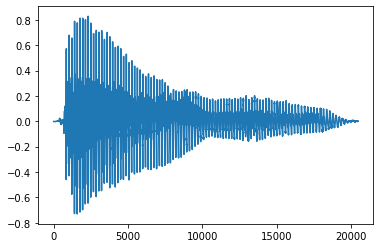

In [31]:
plt.plot(audio[0])

In [32]:
_ = [scipy.io.wavfile.write(join(DATA_PATH,'sound{}.wav'.format(idx)), SAMPLE, sig*AMP) for idx, sig in enumerate(audio)]

In [304]:
_ = [scipy.io.wavfile.write(join(DATA_PATH,'sound{}.wav'.format(idx)), 16000, librosa.effects.trim(librosa.effects.time_stretch(sig, rate=STRETCH), top_db=30)[0]) for idx, sig in enumerate(audio)]

In [18]:
[ librosa.get_duration(sig) for sig in audio ]

[0.9287981859410431,
 0.9287981859410431,
 0.9984580498866213,
 0.9752380952380952,
 0.8823582766439909,
 1.0681179138321995,
 0.9520181405895691,
 0.9287981859410431,
 0.8591383219954648,
 0.9287981859410431,
 0.905578231292517,
 0.905578231292517,
 0.9287981859410431,
 0.8591383219954648,
 0.9287981859410431,
 0.9287981859410431,
 0.9984580498866213,
 0.9520181405895691,
 0.8591383219954648,
 0.9520181405895691,
 0.8591383219954648,
 0.905578231292517,
 0.8126984126984127,
 0.905578231292517,
 0.905578231292517,
 0.8359183673469388,
 0.9752380952380952,
 1.0216780045351475,
 0.8359183673469388,
 0.8126984126984127,
 0.9984580498866213,
 0.8591383219954648,
 0.9752380952380952,
 0.8591383219954648,
 0.905578231292517,
 0.9287981859410431,
 0.9984580498866213,
 0.9752380952380952,
 0.9287981859410431,
 0.9752380952380952,
 0.9287981859410431,
 0.905578231292517,
 0.9520181405895691,
 0.905578231292517,
 0.9287981859410431,
 0.9752380952380952,
 0.8823582766439909,
 1.0216780045351475,
